In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 데이터 불러오기

jeju_card_df = pd.read_csv('jeju_card.csv')
jeju_card_df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


## A. 데이터 탐색 및 전처리

### 1. 데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.

In [3]:
# 데이터 탐색하기

jeju_card_df.shape

(19573, 11)

In [4]:
jeju_card_df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [5]:
# 데이터 타입, 결측값(non-null)이 아닌 데이터 확인

jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [6]:
# 데이터의 통계 정보 요약(숫자) -> 다른 데이터 타입도 보고 싶다면, include='all' 추가

jeju_card_df.describe(include='all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


### 2. 각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.

In [7]:
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [8]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



### 3. 2017년과 2018년의 데이터만 추출해 주세요.

In [9]:
jeju_card_df['연도'] = jeju_card_df['연월'].str.split('-').str[0]

In [10]:
jeju_card_df = jeju_card_df[jeju_card_df['연도'] != '2016']

In [11]:
jeju_card_df.shape

(16707, 12)

## 연령대 컬럼 전처리

In [12]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01'] 



In [13]:
jeju_card_df.loc[jeju_card_df['연령대'] == '20 미만', '연령대'] = '20대미만'

In [14]:
jeju_card_df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

## B. 연월별 이용 금액 시각화

### 1. 연월별 카드 이용 추이를 비교해 보세요. 
### 2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.

In [15]:
jeju_card_df.groupby('연월').sum(numeric_only=True)

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


In [16]:
groupby_ym = jeju_card_df.groupby('연월').sum(numeric_only=True).reset_index()
groupby_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


Text(0, 0.5, '이용금액(억)')

/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  func(*args, **kwargs)
/Users/crema/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Gly

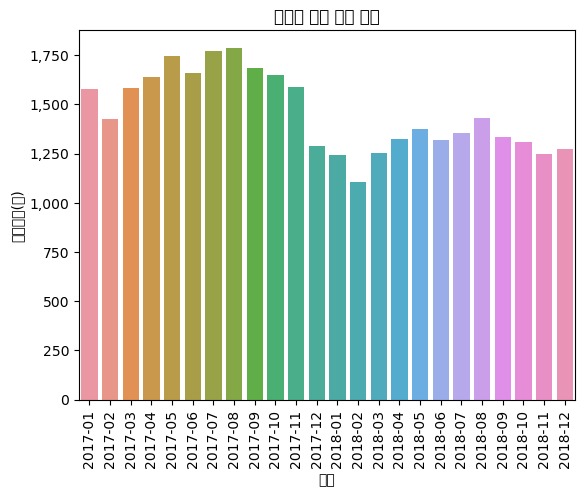

In [17]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.title('연월별 카드 이용 금액')
plt.ylabel('이용금액(억)')

### 2. 2017년과 2018년의 이용 금액 비교
### 이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.


### 연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.

In [18]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

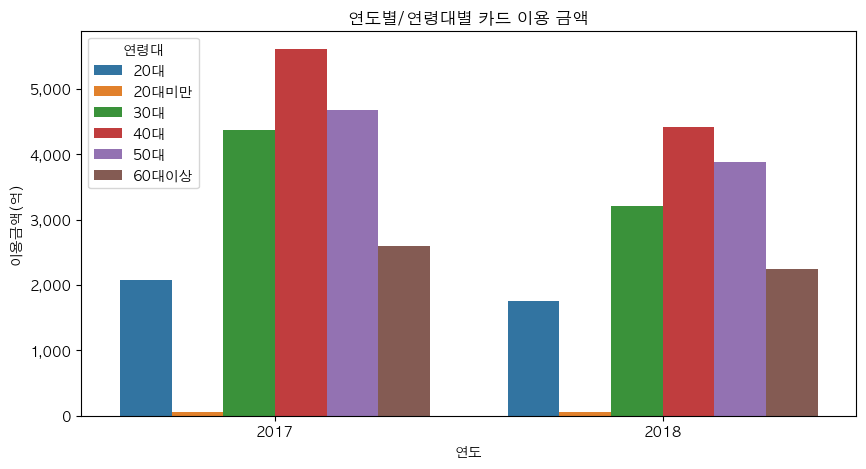

In [19]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [20]:
jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'],
                                      categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'],
                                      ordered=True)

/var/folders/pz/rsgghq1n27s7nj1ccgcxn9xr0000gn/T/ipykernel_17858/1135691136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'],


Text(0, 0.5, '이용금액(억)')

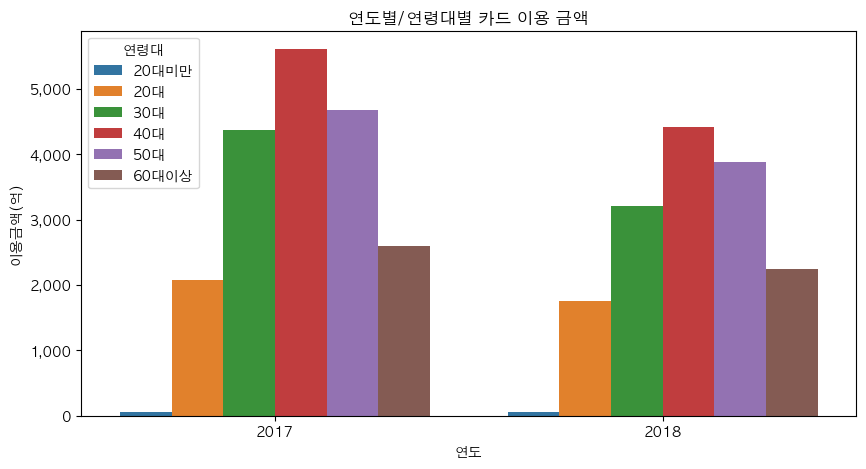

In [21]:
jeju_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=jeju_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [22]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

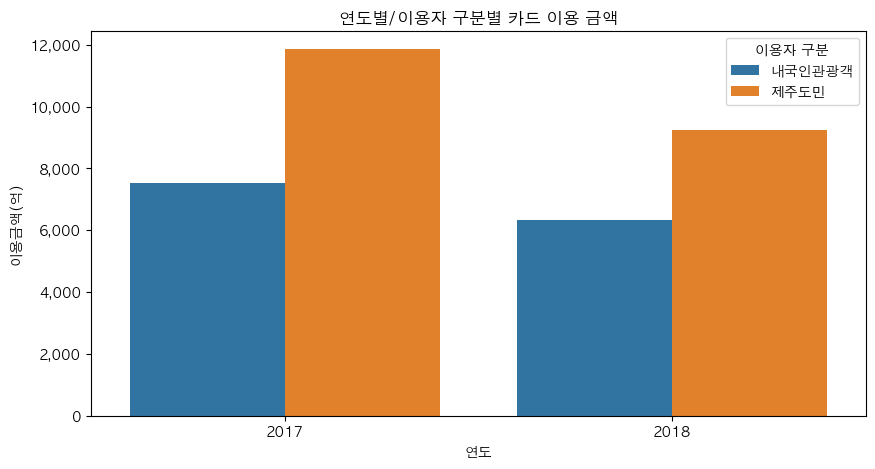

In [23]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [24]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()
groupby_ym_market

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,기타,3337625,6181588,369802572061
2,2017,문화/레져,1166072,1586218,68738522691
3,2017,소매,2543030,3557900,214293310855
4,2017,쇼핑,7840104,21230344,472376164231
5,2017,숙박,492982,658658,66183404375
6,2017,식음료,8396481,15471969,457736442355
7,2017,유흥,437629,623134,72734706220
8,2018,교통,2541600,3495487,216362078283
9,2018,문화/레져,1194976,1801581,69157584998


Text(0, 0.5, '이용금액(억)')

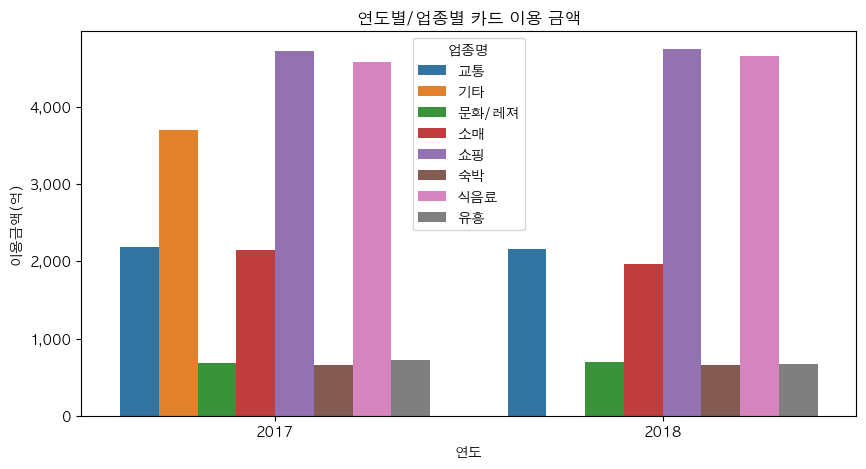

In [25]:
sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [26]:
jeju_card_df[jeju_card_df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
8820,제주도,제주시,읍면,기타,제주도민,60대이상,여,2017-11,515,1087,68991695,2017
8821,제주도,제주시,읍면,기타,제주도민,60대이상,남,2017-11,1320,2902,248832140,2017
8822,제주도,제주시,읍면,기타,제주도민,50대,여,2017-11,825,1586,105991421,2017
8823,제주도,제주시,읍면,기타,제주도민,50대,남,2017-11,1623,3314,344444658,2017
8824,제주도,제주시,읍면,기타,제주도민,40대,여,2017-11,1064,1955,197205323,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
16682,제주도,서귀포시,도심,기타,내국인관광객,30대,여,2017-01,1126,1661,61983110,2017
16683,제주도,서귀포시,도심,기타,내국인관광객,30대,남,2017-01,1289,1902,54641270,2017
16684,제주도,서귀포시,도심,기타,내국인관광객,20대,여,2017-01,795,1060,29265651,2017
16685,제주도,서귀포시,도심,기타,내국인관광객,20대,남,2017-01,719,987,19987700,2017


In [27]:
jeju_card_df[jeju_card_df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

## 업종명 컬럼 전처리

In [28]:
jeju_card_df = jeju_card_df[jeju_card_df['업종명'] != '기타']
jeju_card_df['업종명'].unique()

array(['유흥', '식음료', '숙박', '쇼핑', '소매', '문화/레져', '교통'], dtype=object)

### 연도/연령대별, 연도/이용자 구분별, 연도/업종별 그래프 그리기

Text(0, 0.5, '이용금액(억)')

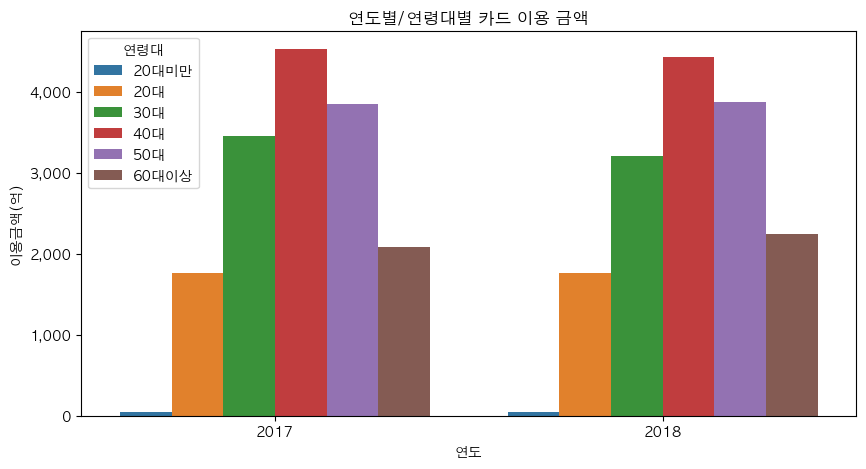

In [29]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0.5, 1.0, '연도별/이용자 구분별 카드 이용 금액')

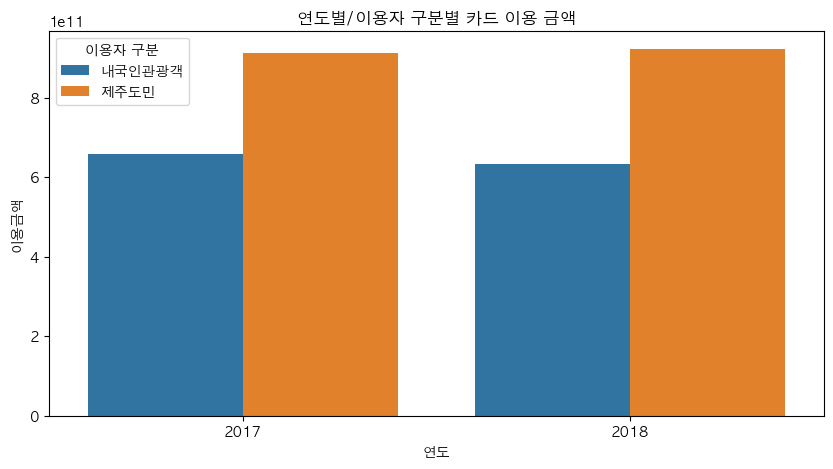

In [30]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')

### 2017년에 비해 2018년에 특별히 이용 금액이 줄어든 업종이 있는지 확인

In [31]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()
groupby_ym_market

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,문화/레져,1166072,1586218,68738522691
2,2017,소매,2543030,3557900,214293310855
3,2017,쇼핑,7840104,21230344,472376164231
4,2017,숙박,492982,658658,66183404375
5,2017,식음료,8396481,15471969,457736442355
6,2017,유흥,437629,623134,72734706220
7,2018,교통,2541600,3495487,216362078283
8,2018,문화/레져,1194976,1801581,69157584998
9,2018,소매,2387234,3327299,196834001389


Text(0, 0.5, '이용금액(억)')

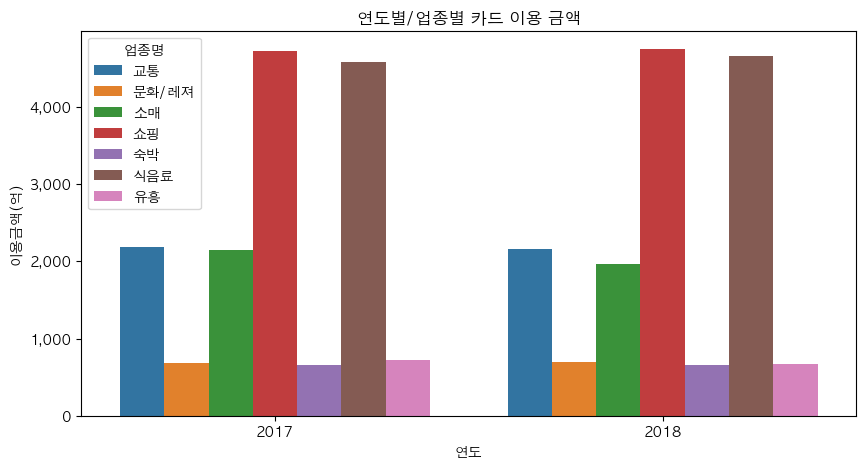

In [32]:
sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

## 연령대별 이용 금액 시각화

In [33]:
groupby_age = jeju_card_df.groupby(['연령대']).sum(numeric_only=True).reset_index()
groupby_age

,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


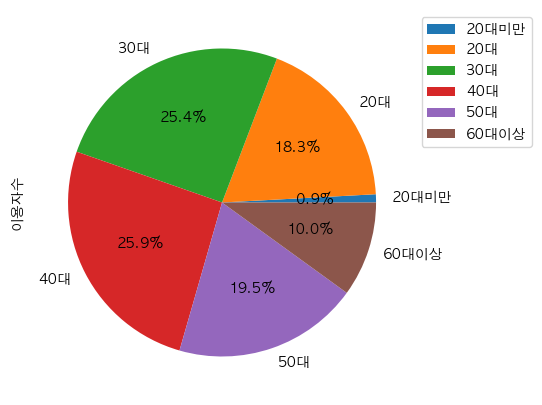

In [34]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title = ('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

TypeError: 'str' object is not callable

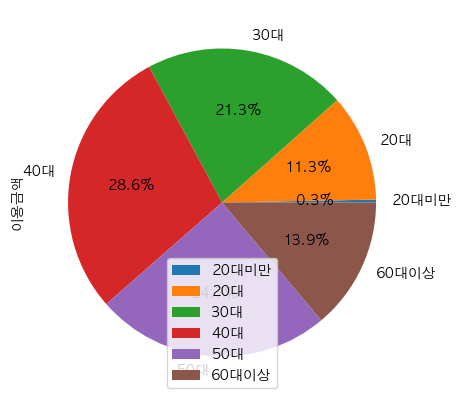

In [35]:
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용 금액 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [36]:
groupby_age['인당이용금액'] = groupby_age['이용금액']/groupby_age['이용자수']
groupby_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,401769,879205,9478228519,23591.239043
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


TypeError: 'str' object is not callable

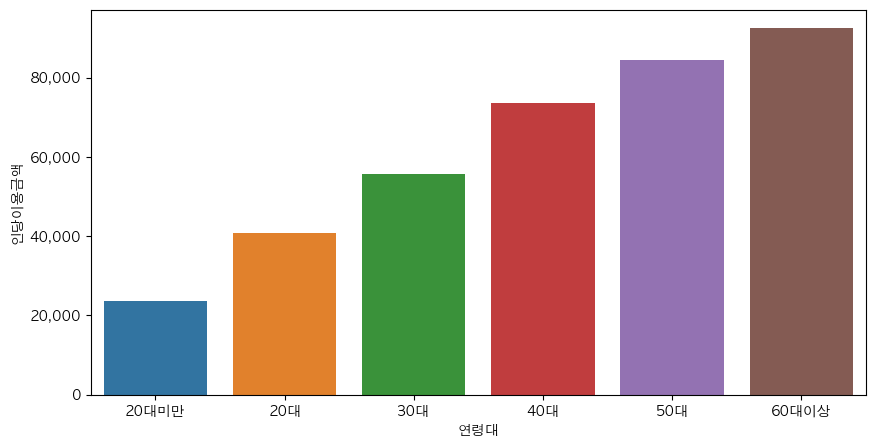

In [37]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

## 연령대별/업종별 이용 금액 시각화

In [38]:
groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
groupby_age_market.head()

,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,3740,4705,285316774
1,20대미만,문화/레져,40499,80073,805245645
2,20대미만,소매,56257,77825,1638514065
3,20대미만,쇼핑,164635,453747,3008788954
4,20대미만,숙박,3681,4953,114390996


TypeError: 'str' object is not callable

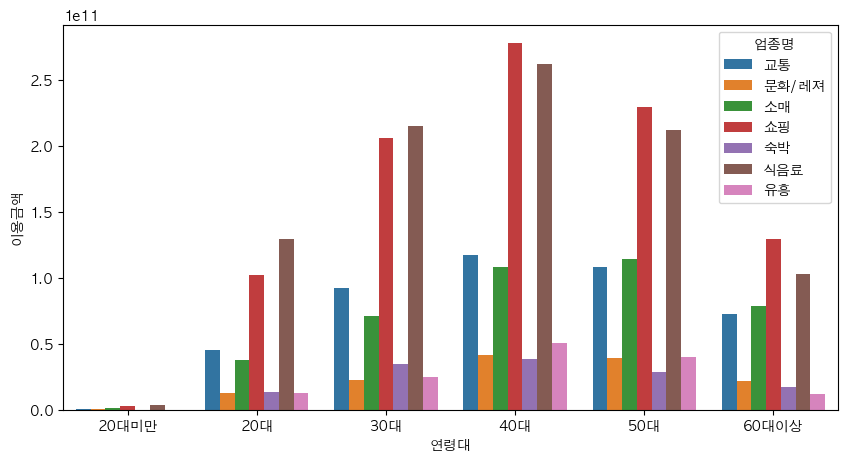

In [39]:
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### 인당 이용금액 비교

TypeError: 'str' object is not callable

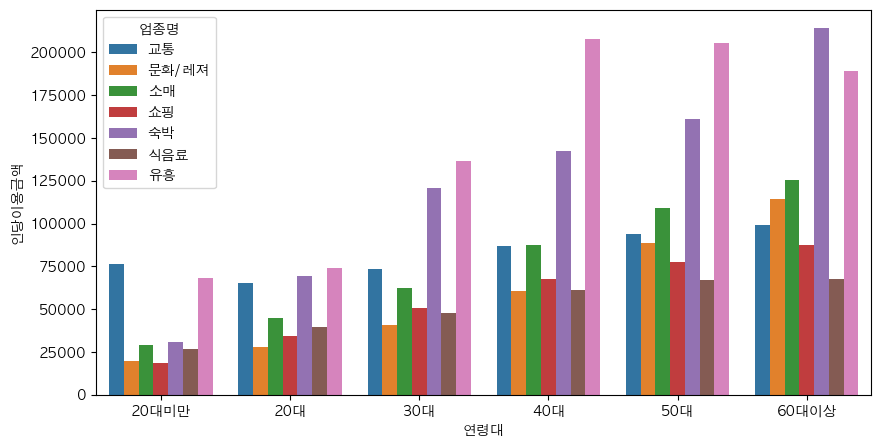

In [40]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

TypeError: 'str' object is not callable

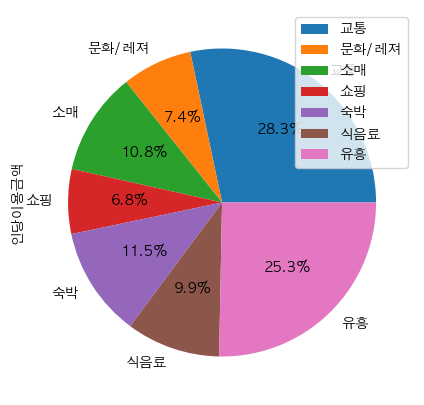

In [41]:
import matplotlib.pyplot as plt

for age in groupby_age_market['연령대'].unique():
    data = groupby_age_market[groupby_age_market['연령대'] == age]
    data.plot(y='인당이용금액', labels=data['업종명'], kind='pie', autopct='%.1f%%')
    plt.title(f'업종별 이용 금액({age})')
    plt.xticks(rotation=90)
    plt.show()

### 연령대별/연월별 이용 금액 시각화

<Axes: xlabel='연령대', ylabel='이용자수'>

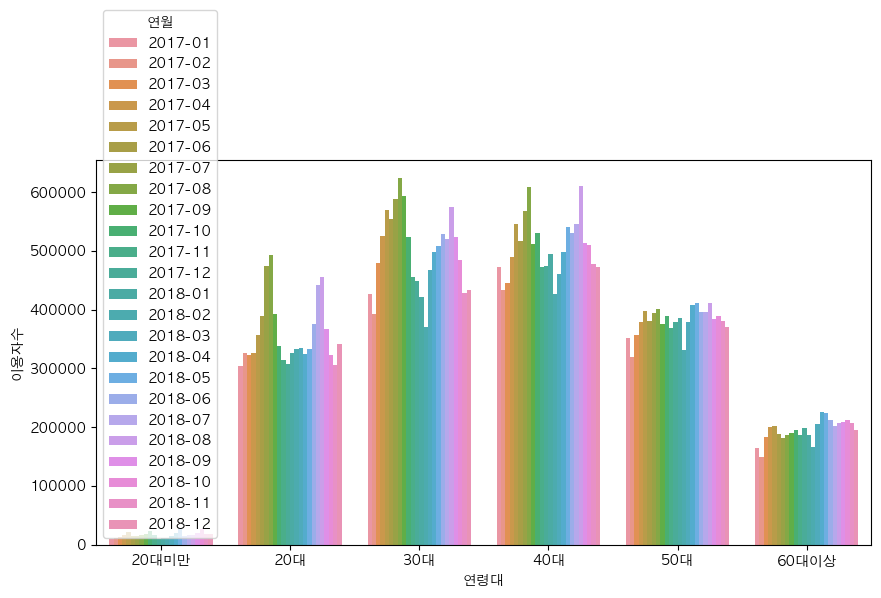

In [43]:
groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_ym, x='연령대', y='이용자수', hue='연월')

TypeError: 'str' object is not callable

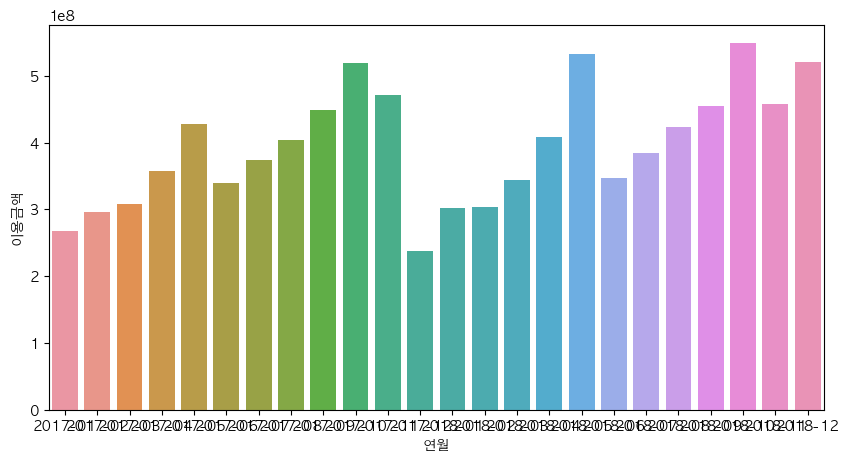

In [44]:
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()